# Evolutionary Computation - Assignment 10 Report

* Kajetan Sulwiński 151954
* Mikołaj Marmurowicz 151956

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib import MatplotlibDeprecationWarning
import warnings

In [2]:
dfTSPA = pd.read_csv('.\\TSPA.csv', sep=';', names=['X', 'Y', 'Cost'])
dfTSPB = pd.read_csv('.\\TSPB.csv', sep=';', names=['X', 'Y', 'Cost'])

min_cost_A = dfTSPA['Cost'].min()
max_cost_A = dfTSPA['Cost'].max()
dfTSPA['Normalized_Cost'] = (dfTSPA['Cost'] - min_cost_A) / (max_cost_A - min_cost_A)

min_cost_B = dfTSPB['Cost'].min()
max_cost_B = dfTSPB['Cost'].max()
dfTSPB['Normalized_Cost'] = (dfTSPB['Cost'] - min_cost_B) / (max_cost_B - min_cost_B)

## Problem description

### Problem

We were to find a cycle that consisted of exactly 50% of the available nodes, where each node had its own cost along with x and y coordinates. The objective function was a sum of node costs and distances (Euclidean) between each traveled node. 

### Solution implementation

We have added a new method - our custom approach to the TSP problem.

* **Custom approach**

    * **Input:**
        - `costDistanceInfo` : A symmetric matrix of distances and costs between nodes
        - `nodesInCycle` : A list of nodes that are available
        - `popSize` : The size of a population
        - `timeForGen` : The maximum runtime of the algorithm

    * **Output:**
        - An array of new `cycle` node IDs

1. Initialize population:
```python
    Create empty population array of size popSize
    Generate four solutions using K-Regret Greedy (weight=0.3)
    Generate the rest using random 
    Sort population by ascending cost
```

2. Main loop (until timeForGen):
```python
    iterCount = 0
    While currTime < timeForGen:
        thresh = min(90, 10*exp(iterCount/750) + 40)  # Penalty threshold
        mutThresh = max(1, 15*exp(-iterCount/500) + 1) # Mutation intensity

        Select parentA using Fitness = 1/cost + boost for costs < 69800
        Select parentB from remaining population
   
        child = recombinationComplex(parentA, parentB)
        nodesFromParentsCount = size of common components
        
        For mutThresh iterations:
            Apply Random mutation inter-move or intra-move
   
        Apply Candidate Local Search (nnSize=5) to child
        Calculate child.costNoPenalty
        Calculate child.cost = costNoPenalty + 4*(nodesFromParents - thresh)
   
        If child is unique (cost not in population):
            Replace worst solution if child is better
        
        iterCount += 1

    return best solution
```

3. Function recombinationComplex(parentA, parentB):
```python
    Find common path components between parents
    Initialize child with common components
    Fill remaining nodes using K-Regret Greedy (k=0.3*remaining_nodes)
    Return child with nodesFromParentsCount = size of common components
```
        

## Presenting the results

### Results presented as minimum, average and maximum of objective function

Presented in a table below, each method and each problem instance is shown.

In [8]:
file_paths = ['..\\Lab6\\TSPA_IteratedLocalSearch.csv', '..\\Lab6\\TSPA_MultistartLocalSearch.csv',
              '..\\Lab7\\TSPA_LnsNoLS.csv', '..\\Lab7\\TSPA_LnsWithLS.csv',
              '..\\Lab9\\TSPALocalSearchAfterRecombComplexRecomb.csv', '..\\Lab9\\TSPALocalSearchAfterRecombSimpleRecomb.csv',
              '..\\Lab9\\TSPANoLocalSearchAfterRecomdComplexRecomb.csv',
              '.\\TSPARes.csv',
              '..\\Lab6\\TSPB_IteratedLocalSearch.csv', '..\\Lab6\\TSPB_MultistartLocalSearch.csv',
              '..\\Lab7\\TSPB_LnsNoLS.csv', '..\\Lab7\\TSPB_LnsWithLS.csv',
              '..\\Lab9\\TSPBLocalSearchAfterRecombComplexRecomb.csv', '..\\Lab9\\TSPBLocalSearchAfterRecombSimpleRecomb.csv',
              '..\\Lab9\\TSPBNoLocalSearchAfterRecomdComplexRecomb.csv',
              '.\\TSPBRes.csv',] 
methods = ['Iterated LS 20 runs', 'Multiple start LS 20 runs', "LNS No LS 20 runs", "LNS With LS 20 runs", 
           "Evolutionary - Complex Recomb. - LS", "Evolutionary - Simple Recomb. - LS", "Evolutionary - Complex Recomb. - No LS", 'Custom']
results = []
best_solutions = []
counter = 0
for file_path, method in zip(file_paths, methods * 2):
    df = pd.read_csv(file_path)
    costs = df.iloc[:, -1]
    minimum = costs.min()
    maximum = costs.max()
    mean = round(costs.mean(), 2)
    if counter < len(methods):
        results.append((method, 'TSPA', f"{mean} ({minimum} - {maximum})"))
    else:
        results.append((method, 'TSPB', f"{mean} ({minimum} - {maximum})"))
    if '..' not in file_path:
        min_sol = df.loc[costs.idxmin()][:-1].to_list()
        best_solutions.append(min_sol)
    counter += 1
# Results from previous reports
results.append(("Greedy LS (Edges) on 2-Regret Weighted 200 runs", "TSPA", "71509.42 (70571 - 72485)"))
results.append(("Greedy LS (Edges) on 2-Regret Weighted 200 runs", "TSPB", "50033.92 (45855 - 54814)"))
results.append(("Steepest LS (Edges) on 2-Regret Weighted 200 runs", "TSPA", "71470.14 (70510 - 72614)"))
results.append(("Steepest LS (Edges) on 2-Regret Weighted 200 runs", "TSPB", "49895.7 (45867 - 54814)"))
result_df = pd.DataFrame(results, columns=['Method', 'Column', 'Value'])
result_df = result_df.pivot(index='Method', columns='Column', values='Value')
result_df.columns.name = None
result_df

,TSPA,TSPB
Method,,
Custom,69796.95 (69564 - 70102),44264.11 (43954 - 44469)
Evolutionary - Complex Recomb. - LS,70044.63 (69829 - 70257),44466.32 (44015 - 44784)
Evolutionary - Complex Recomb. - No LS,71707.53 (71654 - 71807),47066.53 (46314 - 47530)
Evolutionary - Simple Recomb. - LS,70891.79 (70534 - 71264),45118.74 (44676 - 45466)
Greedy LS (Edges) on 2-Regret Weighted 200 runs,71509.42 (70571 - 72485),50033.92 (45855 - 54814)
Iterated LS 20 runs,69256.11 (69095 - 69614),43634.53 (43448 - 44215)
LNS No LS 20 runs,70097.05 (69336 - 71100),44849.16 (43961 - 47055)
LNS With LS 20 runs,70020.58 (69373 - 71128),44481.84 (43845 - 45540)
Multiple start LS 20 runs,71250.74 (70684 - 71957),45795.84 (45108 - 46295)


Information regarding running time and iterations of main loop of different methods.

In [11]:
times_files = ['..\\Lab6\\times.csv', '..\\Lab6\\ILSruns.csv']

results_times = []
for counter_main, file in enumerate(times_files):
    df_temp = pd.read_csv(file, header=None).iloc[:, :-1]
    for count, column in enumerate(df_temp.columns):
        min_value = df_temp[column].min()
        max_value = df_temp[column].max()
        avg_value = df_temp[column].mean()
        if counter_main < 1:
            if count < 1:
                results_times.append(('Multiple start LS', 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) ms"))
            else:
                results_times.append(('Multiple start LS', 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) ms"))
        else:
            if count < 1:
                results_times.append(('Iterated LS', 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
            else:
                results_times.append(('Iterated LS', 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))

times_files = ['..\\Lab7\\TSPA_LnsNoLS_iters.csv', '..\\Lab7\\TSPA_LnsWithLS_iters.csv', '..\\Lab7\\TSPB_LnsNoLS_iters.csv', '..\\Lab7\\TSPB_LnsWithLS_iters.csv',
               '.\\TSPARUNS.csv', '.\\TSPBRUNS.csv',
               '..\\Lab9\\TSPALocalSearchAfterRecombComplexRecombRUNS.csv', '..\\Lab9\\TSPALocalSearchAfterRecombSimpleRecombRUNS.csv', '..\\Lab9\\TSPANoLocalSearchAfterRecomdComplexRecombRUNS.csv',
               '..\\Lab9\\TSPBLocalSearchAfterRecombComplexRecombRUNS.csv', '..\\Lab9\\TSPBLocalSearchAfterRecombSimpleRecombRUNS.csv', '..\\Lab9\\TSPBNoLocalSearchAfterRecomdComplexRecombRUNS.csv',
               ]

for counter_main, file in enumerate(times_files):
    df_temp = pd.read_csv(file, header=None)
    for count, column in enumerate(df_temp.columns):
        min_value = df_temp[column].min()
        max_value = df_temp[column].max()
        avg_value = df_temp[column].mean()
        if file ==  '..\\Lab7\\TSPA_LnsNoLS_iters.csv':
            results_times.append(('LNS No LS', 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  '..\\Lab7\\TSPA_LnsWithLS_iters.csv':
            results_times.append(('LNS With LS', 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  '..\\Lab7\\TSPB_LnsNoLS_iters.csv':
            results_times.append(('LNS No LS', 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  '..\\Lab7\\TSPB_LnsWithLS_iters.csv':
            results_times.append(('LNS With LS', 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  times_files[-8]:
            results_times.append(("Custom", 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  times_files[-7]:
            results_times.append(("Custom", 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  times_files[-6]:
            results_times.append(("Evolutionary - Complex Recomb. - LS", 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  times_files[-5]:
            results_times.append(("Evolutionary - Simple Recomb. - LS", 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  times_files[-4]:
            results_times.append(("Evolutionary - Complex Recomb. - No LS", 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  times_files[-3]:
            results_times.append(("Evolutionary - Complex Recomb. - LS", 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  times_files[-2]:
            results_times.append(("Evolutionary - Simple Recomb. - LS", 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  times_files[-1]:
            results_times.append(("Evolutionary - Complex Recomb. - No LS", 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
times_df = pd.DataFrame(results_times, columns=['Method', 'Column', 'Value'])
times_df = times_df.pivot(index='Method', columns='Column', values='Value')
times_df.columns.name = None  
times_df

,TSPA,TSPB
Method,,
Custom,805.35 (643 - 1135) runs,1026.25 (984 - 1082) runs
Evolutionary - Complex Recomb. - LS,173.1 (164 - 188) runs,266.7 (256 - 279) runs
Evolutionary - Complex Recomb. - No LS,2397.2 (2284 - 2536) runs,3043.95 (2898 - 3163) runs
Evolutionary - Simple Recomb. - LS,133.7 (124 - 197) runs,204.35 (201 - 207) runs
Iterated LS,2602.95 (2358 - 2823) runs,2611.65 (2416 - 2886) runs
LNS No LS,4271.3 (4105 - 4412) runs,3747.8 (2524 - 4215) runs
LNS With LS,3460.75 (2903 - 3698) runs,2837.95 (1847 - 3562) runs
Multiple start LS,36404.82 (33524.3 - 38601.8) ms,34441.575 (33030.7 - 38215.2) ms


### Visualization of the best path for each method

Additionally, a list of node indices is presented.

Custom
TSPA
[120, 44, 25, 16, 171, 175, 113, 56, 31, 196, 81, 90, 165, 40, 185, 179, 145, 78, 92, 129, 57, 55, 52, 106, 178, 49, 14, 144, 102, 62, 9, 148, 137, 23, 186, 89, 183, 143, 0, 117, 93, 140, 108, 18, 159, 22, 146, 181, 34, 160, 48, 54, 177, 10, 190, 4, 112, 84, 184, 35, 131, 149, 65, 116, 43, 42, 41, 193, 139, 68, 46, 115, 59, 118, 51, 176, 80, 79, 133, 151, 162, 123, 127, 70, 135, 154, 180, 53, 63, 94, 124, 152, 1, 101, 97, 26, 100, 86, 75, 2]
TSPB
[168, 195, 145, 15, 3, 70, 13, 132, 169, 188, 6, 134, 147, 90, 51, 121, 131, 122, 135, 63, 38, 27, 16, 1, 156, 198, 117, 193, 31, 54, 73, 136, 190, 80, 162, 45, 142, 175, 78, 5, 177, 36, 61, 91, 141, 77, 81, 153, 187, 163, 89, 127, 103, 113, 176, 194, 166, 86, 185, 95, 130, 99, 22, 179, 66, 94, 47, 148, 60, 20, 28, 149, 4, 140, 183, 152, 170, 34, 55, 18, 62, 124, 106, 143, 35, 109, 0, 29, 160, 33, 144, 111, 82, 21, 8, 104, 138, 182, 11, 139]


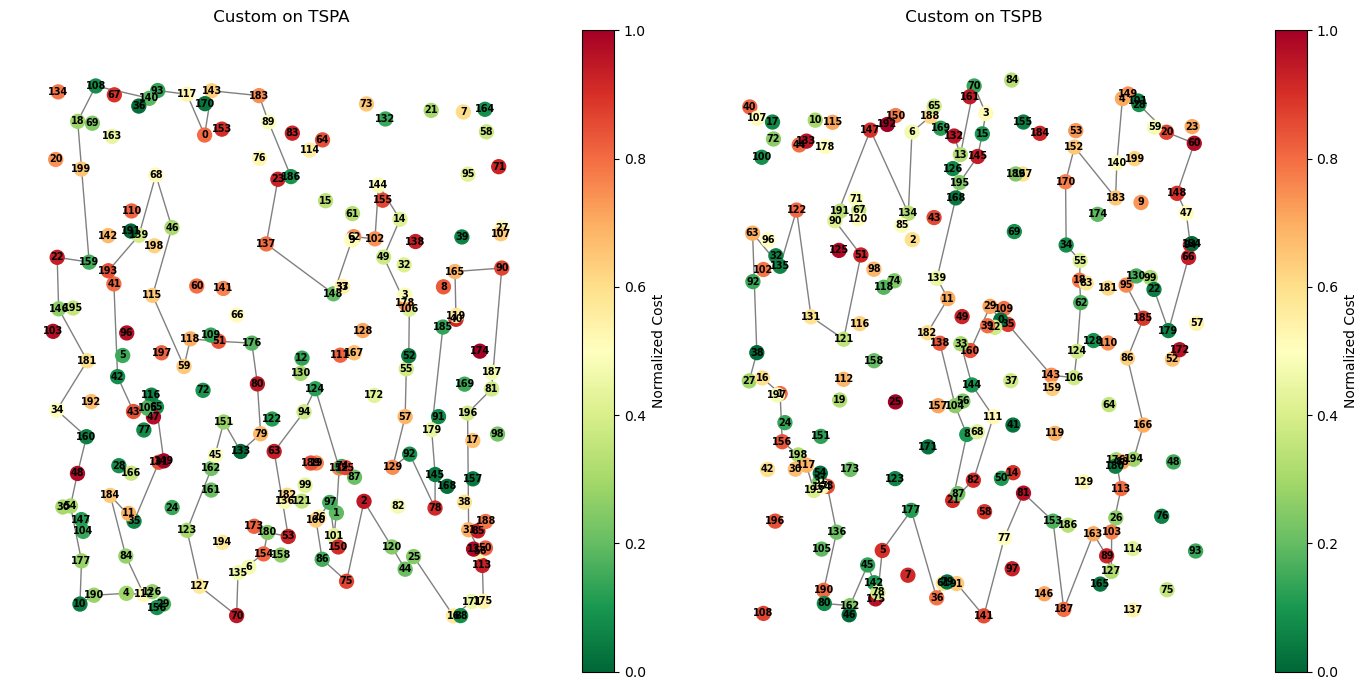

In [19]:
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
cmap = plt.cm.get_cmap('RdYlGn_r')
method = 'Custom'
print(method)
print('TSPA')
print(best_solutions[0])
print('TSPB')
print(best_solutions[1])

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

df_temp = dfTSPA
sol = best_solutions[0]
ax = axs[0]
instance = 'TSPA'
G = nx.Graph()
positions = {}
for idx in sol:
    G.add_node(idx, size=df_temp.loc[idx, 'Normalized_Cost'])
    positions[idx] = (df_temp.loc[idx, 'X'], df_temp.loc[idx, 'Y'])
for idx in [i for i in range(0,200) if i not in sol]:
    G.add_node(idx, size=df_temp.loc[idx, 'Normalized_Cost'])
    positions[idx] = (df_temp.loc[idx, 'X'], df_temp.loc[idx, 'Y'])
for i in range(len(sol) - 1):
    G.add_edge(sol[i], sol[i + 1])
G.add_edge(sol[-1], sol[0])
normalized_costs = df_temp['Normalized_Cost']
norm = mcolors.Normalize(vmin=normalized_costs.min(), vmax=normalized_costs.max())
node_colors = [cmap(norm(df_temp.loc[idx, 'Normalized_Cost'])) for idx in range(0, 200)]
nx.draw(G, pos=positions, with_labels=True, node_color=node_colors, node_size=100,
    font_size=7, edge_color='gray', linewidths=1, font_weight='bold', ax=ax)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Normalized Cost')
ax.set_title(f" {method} on {instance}")

df_temp = dfTSPB
sol = best_solutions[1]
ax = axs[1]
instance = 'TSPB'
G = nx.Graph()
positions = {}
for idx in sol:
    G.add_node(idx, size=df_temp.loc[idx, 'Normalized_Cost'])
    positions[idx] = (df_temp.loc[idx, 'X'], df_temp.loc[idx, 'Y'])
for idx in [i for i in range(0,200) if i not in sol]:
    G.add_node(idx, size=df_temp.loc[idx, 'Normalized_Cost'])
    positions[idx] = (df_temp.loc[idx, 'X'], df_temp.loc[idx, 'Y'])
for i in range(len(sol) - 1):
    G.add_edge(sol[i], sol[i + 1])
G.add_edge(sol[-1], sol[0])
normalized_costs = df_temp['Normalized_Cost']
norm = mcolors.Normalize(vmin=normalized_costs.min(), vmax=normalized_costs.max())
node_colors = [cmap(norm(df_temp.loc[idx, 'Normalized_Cost'])) for idx in range(0, 200)]
nx.draw(G, pos=positions, with_labels=True, node_color=node_colors, node_size=100,
    font_size=7, edge_color='gray', linewidths=1, font_weight='bold', ax=ax)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Normalized Cost')
ax.set_title(f" {method} on {instance}")

plt.tight_layout()
plt.show()

## Additional Information

### Solution checker

We have checked all of the best solutions via the solution checker provided.

### Source code link

The source code is available in a repository [here](https://github.com/Mickeyo0o/EvolutionaryComp/tree/main/Lab10) under the Lab10 folder.

## Conclusions

While other solutions may have resulted in better quality of solutions, we have decided to explore further the capabilties of evolutionary algorithms and their extensions. Our custom approach demonstrates competitive performance in terms of both solution quality and computational efficiency. The use of adaptive thresholds (thresh and mutThresh) and a focus on incorporating common path components from parents ensures the generation of high-quality offspring while maintaining diversity in the population. The method uses K-Regret Greedy initialization, which produces a strong starting population. Usage of Candidate Local Search enchances the offsprings, which results in better solutions.

The Custom approach achieves a balance between solution quality and runtime, while also ensuring the stability. Despite the fact that it does not outperform every method in terms of solution quality, it is able to produce relatively good results in a relatively short runtime.

## Authors

* Kajetan Sulwiński 151954
* Mikołaj Marmurowicz 151956